In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
propTaxes = pd.read_csv("Real_Property_Taxes.csv")

In [4]:
vacBuil = pd.read_csv("Vacant_Buildings.csv")

In [5]:
crime = pd.read_csv("crime.csv")

In [6]:
vacBuil.head(50)

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Zip Codes,2010 Census Neighborhoods
0,0005 048 080617,0005,048,1612 WESTWOOD AVE,08/06/2017,Sandtown-Winchester,Western,7,"(39.30942566, -76.64407735)",27301,221
1,0010 010 080617,0010,010,1720 N CALHOUN ST,08/06/2017,Sandtown-Winchester,Western,7,"(39.30832648, -76.64425597)",27301,221
2,0012 029 080917,0012,029,1630 APPLETON ST,08/09/2017,Easterwood,Western,7,"(39.30725339, -76.64913999)",27301,74
3,0021 075 080617,0021,075,1710 PRESSTMAN ST,08/06/2017,Sandtown-Winchester,Western,7,"(39.30553542, -76.64512031)",27301,221
4,0074 027 080617,0074,027,934 N GILMOR ST,08/06/2017,Sandtown-Winchester,Western,9,"(39.29969704, -76.64324911)",27301,221
5,0096 085 080417,0096,085,1827 RAYNER AVE,08/04/2017,Harlem Park,Western,9,"(39.29682925, -76.6469342)",27301,106
6,0696 048 080617,0696,048,527 S BENTALOU ST,08/06/2017,Carrollton Ridge,Southwestern,9,"(39.2808626, -76.65194848)",27632,36
7,0696 058 080617,0696,058,507 S BENTALOU ST,08/06/2017,Carrollton Ridge,Southwestern,9,"(39.28131308, -76.65219815)",27632,36
8,1107 028 080617,1107,028,1728 N CAROLINE ST,08/06/2017,Oliver,Eastern,12,"(39.31035125, -76.59863589)",26956,180
9,1169 053 080617,1169,053,1113 GREENMOUNT AVE,08/06/2017,Johnston Square,Eastern,12,"(39.30322012, -76.60752633)",13645,124


In [7]:
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Western'],['WESTERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Eastern'],['EASTERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Southern'],['SOUTHERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Southwestern'],['SOUTHWESTERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Northern'],['NORTHERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Southeastern'],['SOUTHEASTERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Central'],['CENTRAL'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Northeastern'],['NORTHEASTERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Notheastern'], ['NORTHEASTERN'])
vacBuil['PoliceDistrict'] = vacBuil['PoliceDistrict'].replace(['Northwestern'],['NORTHWESTERN'])

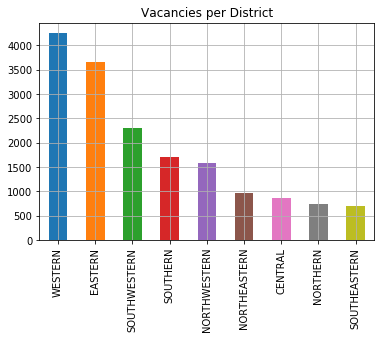

In [8]:
vacBuil['PoliceDistrict'].value_counts().plot(kind='bar', title='Vacancies per District', grid=True)

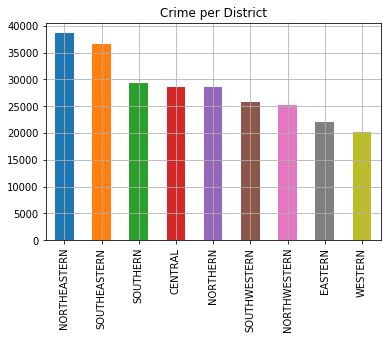

In [9]:
crime['District'].value_counts().plot(kind='bar', title='Crime per District', grid=True)

##### Lookking through the data, we want to only keep 'PRINCIPAL RESIDENCE' ResCode
##### We also dont need to have any of the follwing attributes:'AmountDue', 'AsOfDate'.

In [10]:
propTaxes['PoliceDistrict'].unique()

array(['Southern', 'Western', 'Notheastern', 'Northwestern', nan,
       'Southeastern', 'Southwestern', 'Central', 'Eastern', 'Northern'],
      dtype=object)

In [11]:
southern = propTaxes[propTaxes['PoliceDistrict'] == 'Southern' ]
northern = propTaxes[propTaxes['PoliceDistrict'] == 'Northern']
eastern = propTaxes[propTaxes['PoliceDistrict'] == 'Eastern']
western = propTaxes[propTaxes['PoliceDistrict'] == 'Western']
northeastern = propTaxes[propTaxes['PoliceDistrict'] == 'Notheastern']
northwestern = propTaxes[propTaxes['PoliceDistrict'] == 'Northwestern']
southeastern = propTaxes[propTaxes['PoliceDistrict'] == 'Southeastern']
southwestern = propTaxes[propTaxes['PoliceDistrict'] == 'Southwestern']
central = propTaxes[propTaxes['PoliceDistrict'] == 'Central']

In [12]:
southern.shape

(25253, 16)

In [13]:
southern = southern.drop_duplicates()
southern = southern[southern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
southern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [14]:
northern = northern.drop_duplicates()
northern = northern[northern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
northern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [15]:
eastern = eastern.drop_duplicates()
eastern = eastern[eastern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
eastern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [16]:
western = western.drop_duplicates()
western = western[western['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
western['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [17]:
central = central.drop_duplicates()
central = central[central['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
central['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [18]:
southeastern = southeastern.drop_duplicates()
southeastern = southeastern[southeastern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
southeastern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [19]:
southwestern = southwestern.drop_duplicates()
southwestern = southwestern[southwestern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
southwestern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [20]:
northwestern = northwestern.drop_duplicates()
northwestern = northwestern[northwestern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
northwestern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [21]:
northeastern = northeastern.drop_duplicates()
northeastern = northeastern[northeastern['ResCode'] != 'NOT A PRINCIPAL RESIDENCE']
northeastern['ResCode'].unique()

array(['PRINCIPAL RESIDENCE      '], dtype=object)

In [22]:
southMean = southern['CityTax'].mean() + southern['StateTax'].mean()
southEastMean = southeastern['CityTax'].mean() + southeastern['StateTax'].mean()
southWestMean = southwestern['CityTax'].mean() + southwestern['StateTax'].mean()
northMean = northern['CityTax'].mean() + northern['StateTax'].mean()
northEastMean = northeastern['CityTax'].mean() + northeastern['StateTax'].mean()
northWestMean = northwestern['CityTax'].mean() + northwestern['StateTax'].mean()
eastMean = eastern['CityTax'].mean() + eastern['StateTax'].mean()
westMean = western ['CityTax'].mean() + western ['StateTax'].mean()
centMean = central['CityTax'].mean() + central['StateTax'].mean()

In [23]:
d = {'PoliceDistrict': ['South', 'Southeastern', 'Southwestern', 'Northern', 'Northeastern', 'Northwestern', 'Eastern', 'western', 'Central'],'Mean': [southMean, southEastMean,southWestMean,northMean,northEastMean,northWestMean,eastMean,westMean,centMean]}

In [24]:
avgs = pd.DataFrame(data=d)

In [25]:
avgs = avgs.sort_values(by='Mean',ascending = False)

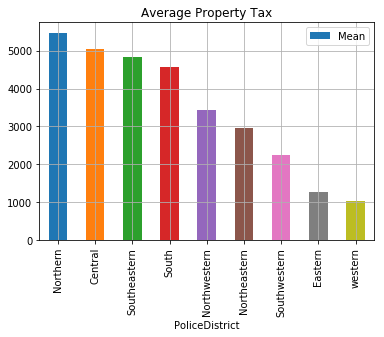

In [26]:
avgs.plot(kind='bar', title='Average Property Tax', grid=True, x='PoliceDistrict', y='Mean' )

-----------------------------------------------
This section corresponds to 2B on the report.

In [27]:
larsh = crime[crime['Description'] == 'LARCENY']
son = larsh[larsh['District'] == 'SOUTHERN' ].shape[0]
non = larsh[larsh['District'] == 'NORTHERN' ].shape[0]
ean = larsh[larsh['District'] == 'EASTERN' ].shape[0]
wen = larsh[larsh['District'] == 'WESTERN' ].shape[0]
noean = larsh[larsh['District'] == 'NORTHEASTERN' ].shape[0]
nowen = larsh[larsh['District'] == 'NORTHWESTERN' ].shape[0]
soean = larsh[larsh['District'] == 'SOUTHEASTERN' ].shape[0]
sowen = larsh[larsh['District'] == 'SOUTHWESTERN' ].shape[0]
cen = larsh[larsh['District'] == 'CENTRAL' ].shape[0]

so = crime[crime['District'] == 'SOUTHERN' ].shape[0]
no = crime[crime['District'] == 'NORTHERN' ].shape[0]
ea = crime[crime['District'] == 'EASTERN' ].shape[0]
we = crime[crime['District'] == 'WESTERN' ].shape[0]
noea = crime[crime['District'] == 'NORTHEASTERN' ].shape[0]
nowe = crime[crime['District'] == 'NORTHWESTERN' ].shape[0]
soea = crime[crime['District'] == 'SOUTHEASTERN' ].shape[0]
sowe = crime[crime['District'] == 'SOUTHWESTERN' ].shape[0]
ce = crime[crime['District'] == 'CENTRAL' ].shape[0]

mordi = crime[crime['Description'] == 'SHOOTING']
sos = mordi[mordi['District'] == 'SOUTHERN' ].shape[0]
nos = mordi[mordi['District'] == 'NORTHERN' ].shape[0]
eas = mordi[mordi['District'] == 'EASTERN' ].shape[0]
wes = mordi[mordi['District'] == 'WESTERN' ].shape[0]
noeas = mordi[mordi['District'] == 'NORTHEASTERN' ].shape[0]
nowes = mordi[mordi['District'] == 'NORTHWESTERN' ].shape[0]
soeas = mordi[mordi['District'] == 'SOUTHEASTERN' ].shape[0]
sowes = mordi[mordi['District'] == 'SOUTHWESTERN' ].shape[0]
ces = mordi[mordi['District'] == 'CENTRAL' ].shape[0]

sov = vacBuil[vacBuil['PoliceDistrict'] == 'SOUTHERN'].shape[0]
nov = vacBuil[vacBuil['PoliceDistrict'] == 'NORTHERN' ].shape[0]
eav = vacBuil[vacBuil['PoliceDistrict'] == 'EASTERN' ].shape[0]
wev = vacBuil[vacBuil['PoliceDistrict'] == 'WESTERN' ].shape[0]
noeav = vacBuil[vacBuil['PoliceDistrict'] == 'NORTHEASTERN' ].shape[0]
nowev = vacBuil[vacBuil['PoliceDistrict'] == 'NORTHWESTERN' ].shape[0]
soeav = vacBuil[vacBuil['PoliceDistrict'] == 'SOUTHEASTERN' ].shape[0]
sowev = vacBuil[vacBuil['PoliceDistrict']== 'SOUTHWESTERN' ].shape[0]
cev = vacBuil[vacBuil['PoliceDistrict'] == 'CENTRAL' ].shape[0]

g = {'Region': ["Southern", "Southeastern", "Southwestern", "Northern", "Northwestern", "Northeastern", "Eastern", "Western", "Central"],
     'Avg. Property Tax': [southMean, southEastMean, southWestMean, northMean, northWestMean, northEastMean, eastMean, westMean, centMean],
     'Crime Incidents': [so, soea, sowe, no, nowe, noea, ea, we, ce],
     'No. of Larceny': [son, soean, sowen, non, nowen, noean, ean, wen, cen],
     'Recorded No. of Shootings': [sos, soeas, sowes, nos, nowes, noeas, eas, wes, ces],
     'Vacant Prprty Count': [sov, soeav, sowev, nov, nowev, noeav, eav, wev, cev]}
scatterSet = pd.DataFrame(data=g)
scatterSet

,Region,Avg. Property Tax,Crime Incidents,No. of Larceny,Recorded No. of Shootings,Vacant Prprty Count
0,Southern,4578.590584,29363,6595,340,1713
1,Southeastern,4843.351145,36675,9108,173,701
2,Southwestern,2239.378969,25691,5105,408,2304
3,Northern,5472.633669,28527,6966,198,733
4,Northwestern,3439.913550,25200,5348,331,1579
5,Northeastern,2951.823197,38634,7881,309,961
6,Eastern,1276.372075,22084,4205,427,3652
7,Western,1035.716502,20175,3664,500,4253
8,Central,5038.048845,28612,8079,192,866


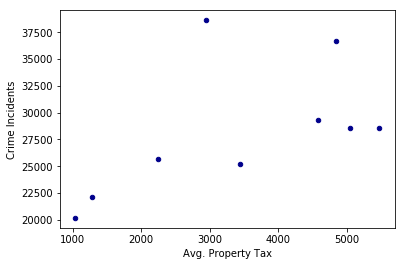

In [28]:
corr1 = scatterSet.plot.scatter(x='Avg. Property Tax', y='Crime Incidents', c='DarkBlue')
corr1

In [29]:
scatterSet['Avg. Property Tax'].corr(scatterSet['Crime Incidents'])

0.5533969087858234

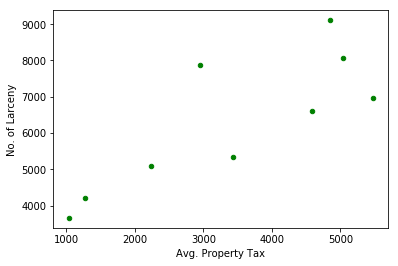

In [30]:
corr2 = scatterSet.plot.scatter(x='Avg. Property Tax', y='No. of Larceny', c='Green')
corr2

In [31]:
scatterSet['Avg. Property Tax'].corr(scatterSet['No. of Larceny'])

0.8081982198709676

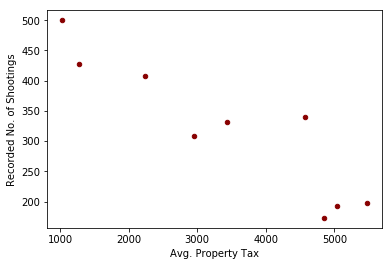

In [32]:
corr3 = scatterSet.plot.scatter(x='Avg. Property Tax', y='Recorded No. of Shootings', c='#880000')
corr3

In [33]:
scatterSet['Avg. Property Tax'].corr(scatterSet['Recorded No. of Shootings'])

-0.9191412236724367

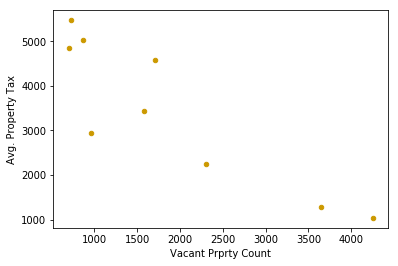

In [34]:
corr4 = scatterSet.plot.scatter(x='Vacant Prprty Count', y='Avg. Property Tax', c='#cc9900')
corr4

In [35]:
scatterSet['Avg. Property Tax'].corr(scatterSet['Vacant Prprty Count'])

-0.8868543067219442

-----------------------------------------------

In [36]:
(vacBuil['PoliceDistrict'].unique())

array(['WESTERN', 'SOUTHWESTERN', 'EASTERN', 'SOUTHEASTERN',
       'NORTHWESTERN', 'NORTHERN', 'NORTHEASTERN', 'SOUTHERN', 'CENTRAL'],
      dtype=object)

In [37]:
dfV = vacBuil['PoliceDistrict'].value_counts().rename_axis('PoliceDistrict').reset_index(name='vacancy')
dfV['PoliceDistrict'] = dfV['PoliceDistrict'].replace(['Notheastern'],['NORTHEASTERN'])
dfV = dfV[:9]

In [38]:
dfC = crime['District'].value_counts().rename_axis('PoliceDistrict').reset_index(name='crime')

In [39]:
dfV

,PoliceDistrict,vacancy
0,WESTERN,4253
1,EASTERN,3652
2,SOUTHWESTERN,2304
3,SOUTHERN,1713
4,NORTHWESTERN,1579
5,NORTHEASTERN,961
6,CENTRAL,866
7,NORTHERN,733
8,SOUTHEASTERN,701


In [40]:
dfC

,PoliceDistrict,crime
0,NORTHEASTERN,38634
1,SOUTHEASTERN,36675
2,SOUTHERN,29363
3,CENTRAL,28612
4,NORTHERN,28527
5,SOUTHWESTERN,25691
6,NORTHWESTERN,25200
7,EASTERN,22084
8,WESTERN,20175


In [41]:
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['western'],['WESTERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Eastern'],['EASTERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['South'],['SOUTHERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Southwestern'],['SOUTHWESTERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Northern'],['NORTHERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Southeastern'],['SOUTHEASTERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Central'],['CENTRAL'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Northeastern'],['NORTHEASTERN'])
avgs['PoliceDistrict'] = avgs['PoliceDistrict'].replace(['Northwestern'],['NORTHWESTERN'])

In [42]:
avgs

,PoliceDistrict,Mean
3,NORTHERN,5472.633669
8,CENTRAL,5038.048845
1,SOUTHEASTERN,4843.351145
0,SOUTHERN,4578.590584
5,NORTHWESTERN,3439.913550
4,NORTHEASTERN,2951.823197
2,SOUTHWESTERN,2239.378969
6,EASTERN,1276.372075
7,WESTERN,1035.716502


In [43]:
modelUse = avgs
modelUse = modelUse.set_index('PoliceDistrict').join(dfC.set_index('PoliceDistrict'))
modelUse = modelUse.join(dfV.set_index('PoliceDistrict'))
modelUse

,Mean,crime,vacancy
PoliceDistrict,,,
NORTHERN,5472.633669,28527,733
CENTRAL,5038.048845,28612,866
SOUTHEASTERN,4843.351145,36675,701
SOUTHERN,4578.590584,29363,1713
NORTHWESTERN,3439.913550,25200,1579
NORTHEASTERN,2951.823197,38634,961
SOUTHWESTERN,2239.378969,25691,2304
EASTERN,1276.372075,22084,3652
WESTERN,1035.716502,20175,4253


## Models
Were gonna have two Models.
One is going to take the average Property tax per District and crime 
Another is gonna be the vacancy rates per city and crime.
Looking to see which is a better marker for crime prediction.

In [44]:
dataset_xT = modelUse['Mean'][4:].values
dataset_yT = modelUse['crime'][4:].values
dataset_xT = dataset_xT.reshape(-1,1)
dataset_yT = dataset_yT.reshape(-1,1)

In [45]:
dataset_xTV = modelUse['vacancy'][4:].values
dataset_yTV = modelUse['crime'][4:].values
dataset_xTV = dataset_xTV.reshape(-1,1)
dataset_yTV = dataset_yTV.reshape(-1,1)

In [46]:
test_X = modelUse['Mean'][5:].values
test_Y = modelUse['crime'][5:].values

In [47]:
test_X = test_X.reshape(-1,1)
test_Y = test_Y.reshape(-1,1)

In [48]:
regr = linear_model.LinearRegression()

In [49]:
test_XV = modelUse['vacancy'][5:].values
test_YV = modelUse['crime'][5:].values
test_XV = test_XV.reshape(-1,1)
test_YV = test_YV.reshape(-1,1)

In [50]:
regr.fit(dataset_xT, dataset_yT)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
regrv = linear_model.LinearRegression()
regrv.fit(dataset_xTV, dataset_yTV)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
test = regr.predict(test_X)
testV = regrv.predict(test_XV)

Coefficients: 
 [[4.38608898]]
Mean squared error: 20467503.13
Variance score: 0.61


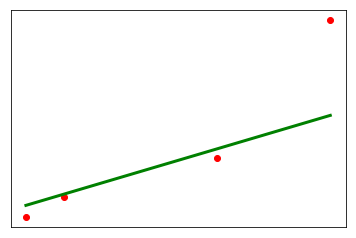

In [53]:
plt.scatter(test_X, test_Y, color='red')
plt.plot(test_X, test, color='green',linewidth=3)
plt.xticks(())
plt.yticks(())
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_Y, test))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_Y, test))

plt.show()

Coefficients: 
 [[-4.37761877]]
Mean squared error: 8321614.14
Variance score: 0.84


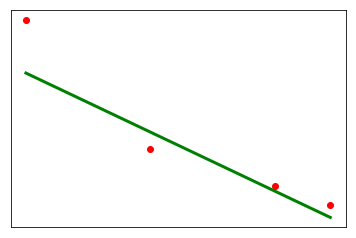

In [54]:
plt.scatter(test_XV, test_YV, color='red')
plt.plot(test_XV, testV, color='green',linewidth=3)
plt.xticks(())
plt.yticks(())
# The coefficients
print('Coefficients: \n', regrv.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_YV, testV))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_YV, testV))

plt.show()